<a href="https://colab.research.google.com/github/CamelGoong/DataScience_Practicing/blob/main/%5BBoost%5DAnalysis_1_Distribution_of_Seoul_General_Hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.1 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#1.2 시각화를 위한 폰트 설정

In [2]:
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 
# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


#1.3 데이터 로드하기

In [3]:
#from google.colab import files
#uploaded = files.upload() # 파일 업로드 기능 실행

In [4]:
#!unzip -qq /content/소상공인시장진흥공단_상가업소정보_의료기관_201909.zip

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/데이터 사이언스/data.csv", low_memory = False) #  low_memory = False로 설정해달라는 warning이 뜸.
df.shape

(91335, 39)

#1.4 데이터 미리보기

In [6]:
# shift + tab을 누르면, dostring의 공식 문서를 볼 수 있음
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,일반 의원,41.0,경기도,41273.0,안산시 단원구,4127360000,선부3동,4.127311e+09,선부동,4127310900210810000,1,대지,1081,NaN,경기도 안산시 단원구 선부동 1081,412733191011,경기도 안산시 단원구 달미로,10,NaN,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,일반 의원,11.0,서울특별시,11680.0,강남구,1168065600,도곡2동,1.168012e+09,도곡동,1168011800204670014,1,대지,467,14.0,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,NaN,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,일반 의원,41.0,경기도,41390.0,시흥시,4139059100,정왕1동,4.139013e+09,정왕동,4139013200217400001,1,대지,1740,1.0,경기도 시흥시 정왕동 1740-1,413903199049,경기도 시흥시 중심상가로,178,NaN,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955


In [7]:
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,일반 의원,44.0,충청남도,44131.0,천안시 동남구,4413153000,원성1동,4.413111e+09,원성동,4413110700202660017,1,대지,266,17.0,충청남도 천안시 동남구 원성동 266-17,441313249040,충청남도 천안시 동남구 중앙로,92,NaN,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


#1.5 데이터 요약하기

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [9]:
# 컬럼명만 출력
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [10]:
# 데이터 타입
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

#1.6 결측치

In [11]:
null_count = df.isnull().sum() # python에서 True는 1에 해당

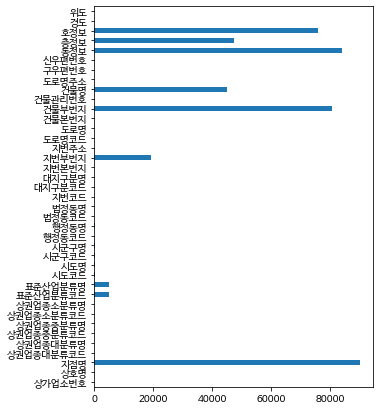

In [12]:
# 결측치를 이용해서 막대 그래프
null_count.plot.barh(figsize = (5,7)) # barh는 x축과 y축을 바꿔서 bar를 그려주는 것

In [13]:
# 위에서 계산한 결측치 수를 reset_index를 통해 데이터 프레임으로 만들수 있음.
# df_null_count 변수에 결과를 담아서 head로 미리보기

df_null_count = null_count.reset_index()

df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


#1.7 컬럼명 변경하기

In [14]:
df_null_count.columns = ['컬럼명', '결측치 수']
df_null_count.head()

,컬럼명,결측치 수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


#1.8 정렬하기

In [15]:
# df_null_count 데이터프레임에 있는 결측치 수 컬럼을 sort_values를 통해 정렬해서
# 결측치가 많은 순으로 상위 10개만 출력

df_null_count_top = df_null_count.sort_values(by = '결측치 수', ascending = False).head(10) # sort_index: index로 sort # 결측치수로 정렬 # 기본옵션은 ascending = True로 되어있기 때문에, 내림차순은 False로 해야 함.

# 밑의 결과를 보면, 표준산업분류명까지는 결측치가 많아서 없어도 상관없을듯

#1.9 특정 컬럼만 불러오기

In [16]:
# 지점명 컬럼 가져오기
# NAN: Not A Number의 약자로 결측치를 의미

df['지점명'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [17]:
# '컬럼명' 이라는 컬럼의 값만 가져와서  drop_columns 라는 변수에 list형태로 담습니다.

drop_columns = df_null_count_top['컬럼명'].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [18]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옴

df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


#1.10 제거하기

In [19]:
# 위에서 저장해주었던 drop_columns를 기준으로  axis = 1 열 기준으로 drop
print(df.shape)
df = df.drop(drop_columns, axis = 1)
print(df.shape)

# 컬럼이 39 -> 29 개로 감소한 것을 확인할 수 있음.

(91335, 39)
(91335, 29)


In [20]:
df.info()

# 메모리 사용량도 27 -> 20MB로 감소

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

#1.11 기초 통계값 보기

In [21]:
# 평균값
df.dtypes # 데이터의 유형 /  int float 등의 수치형 데이터에 대해서만 평균값을 구할 수 있음
print(df['위도'].mean())

# 중앙값
print(df['위도'].median())

# 최댓값
print(df['위도'].max())

# 최솟값
print(df['위도'].min())

# 갯수
print(df['위도'].count()) # 위도 값이 몇개인지

36.62471119236673
37.23465231770329
38.499658570559795
33.2192896688307
91335


In [22]:
#  위도를 describe로 요약 / 위에서 구했던 평균, 표준편차, 최솟값, 1분위수 2분위수 3분위 수 4분위수를 구할 수 있음.

df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [23]:
# 2개의 컬럼을 describe로 요약

df[["위도", "경도"]].describe() # 2개 이상의 컬럼을 동시에 가져올 때는 리스트 형태로 호출해야 함.

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [24]:
# describe로 문자열 데이터타입의 요약을 봅니다

df.describe(include = 'object') # describe의 기본값은 수치 데이터에 대해서 요약이 됨. # include = 'object'로 하면, 문자열 데이터에 대해서만 요약함.

# Top: 가장 많이 등장한 object
# freq: freqiency, 빈도수. 가장 많이 등장한 Top이 등장한 빈도수

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


In [25]:
# 중복을 제거한 값 보기
# 위의 문자형 데이터로 요약을 하면 unique 가 나옴.

# 상권업종대분류명
df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [26]:
df['상권업종대분류명'].nunique() # unique의 갯수

1

In [27]:
# 상권업종중분류명
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [28]:
df['상권업종중분류명'].nunique()

5

In [29]:
# 상권업종소분류명
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [30]:
df['상권업종소분류명'].nunique()

34

In [31]:
len(df['상권업종소분류명'].unique()) # .nunique랑 동일

34

In [32]:
# 그룹화된 요약값 보기 - value_counts: 카테고리 형태의 데이터 갯수를 셀 수 있음.
# 시도명 세기

city = df['시도명'].value_counts()

In [33]:
# normalize = True 옵션을 사용하면 비율을 구할 수 있음.

city_normalize = df['시도명'].value_counts(normalize = True)

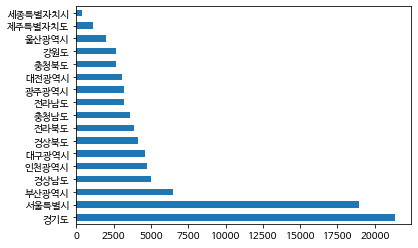

In [34]:
city.plot.barh()

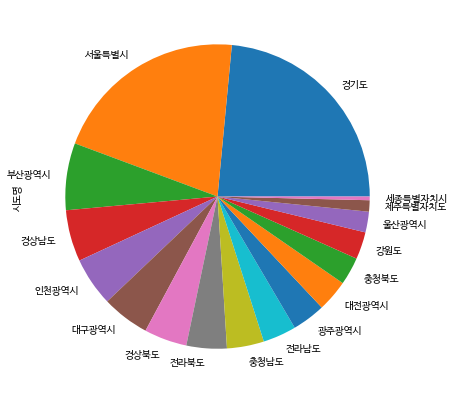

In [35]:
city_normalize.plot.pie(figsize = (7,7))

#1.12  데이터 색인하기

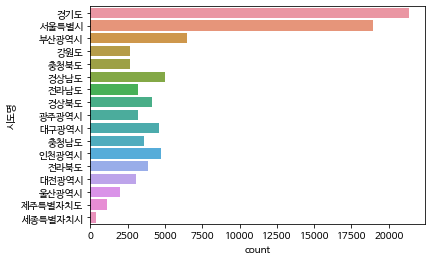

In [40]:
# seaborn의 countplot ㄱ리기
c = sns.countplot(data = df, y = '시도명') # 위에서 했던 것처럼, 내가 counts를 따로 구해서 그릴 필요 없이, 자동으로 내부적으로 통계량을 구해서 그려줌. / 보통 x,y축 중에 하나만 지정을 해주면 됨.

In [49]:
# 상권업종대분류명으로 갯수 세기
c = df['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [47]:
# 상권업종중분류명 갯수 세기
n = df['상권업종중분류명'].value_counts(normalize = True)

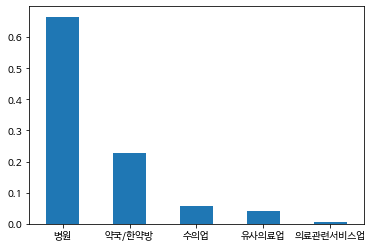

In [55]:
n.plot.bar(rot = 0) # rot: label값을 얼마나 회전을 시킬 것인지

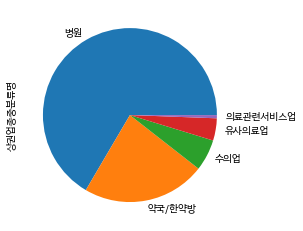

In [56]:
n.plot.pie()

In [65]:
# 상권업종소분류명
c = df['상권업종소분류명'].value_counts()

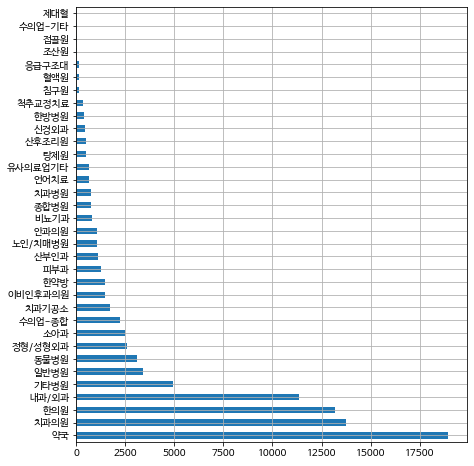

In [69]:
c.plot.barh(figsize = (7, 8), grid = True)

#데이터 색인하기(중요!!)

In [73]:
# 상권업종중분류명이 약국/한약방인 데이터만 가져와서 df_medical이라는 변수에 담기

df_medical = df[df['상권업종중분류명'] == '약국/한약방'].copy() # Boolean indexing을 원리로 하는 것. / copy를 해야지 아니면, warning이 뜸.
df_medical.head(1) # 이렇게 하면. df 원본에는 영향이 없음.

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,용인시 수지구,4146551000,풍덕천1동,4.146510e+09,풍덕천동,4146510100207120002,1,대지,712,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528


In [75]:
# 상권업종대분류명에서 의료만 가져오기
# df.loc을 사용하면 행, 열을 함께 가져올 수 있음.
# 이 기능을 사용해서 '상권업종중분류명을 가져오기'

df.loc[df['상권업종대분류명'] == '의료', '상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [76]:
# 위와 똑같은 기능을 이런식으로 변수에 따로, Boolean값을 담아서 작성할 수도 있음.
m = df['상권업종대분류명'] == '의료' # 행 중에서 '상권업종대분류명'이 '의료'인 행을 나타내는 Boolean
df.loc[m, '상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [83]:
# 유사의료업만 따라 모아보기
df_medi = df[df['상권업종중분류명'] == "유사의료업"]

In [82]:
df['상호명'].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [87]:
df_medi['상호명'].value_counts().head(10)

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
수치과기공소      10
고려수지침학회     10
제일치과기공소      9
어울림치과기공소     8
스마일치과기공소     8
이사랑치과기공소     8
Name: 상호명, dtype: int64

In [91]:
# 여러 조건으로 색인하기
# '상권업종소분류명'이 '약국'
# '시도명'이 '서울특별시'

df_seoul_drug = df[(df['상권업종소분류명'] == "약국") & (df['시도명'] =='서울특별시')] #  연산자 우선순위 때문에 각 조건을 () 괄호로 따로 묶어서 & 로 연결해주지 않으면 error가 발생
print(df_seoul_drug.shape)
df_seoul_drug.head(3)

(3579, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,강남구,1168064000,역삼1동,1.168010e+09,역삼동,1168010100208210000,1,대지,821,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11740.0,강동구,1174070000,둔촌2동,1.174011e+09,둔촌동,1174010600206300000,1,대지,630,서울특별시 강동구 둔촌동 630,117403124002,서울특별시 강동구 명일로,172,1174010600106090000000001,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11260.0,중랑구,1126069000,신내2동,1.126011e+09,신내동,1126010600206460000,1,대지,646,서울특별시 중랑구 신내동 646,112603106007,서울특별시 중랑구 신내로,211,1126010600106460000000300,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424


In [93]:
# 구별로 보기
# 구별로 약국이 몇개있는지 확인

c = df_seoul_drug['시군구명'].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [96]:
# normalize = True로 비율 구하기
df_seoul_drug['시군구명'].value_counts(normalize = True)
n.head()

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

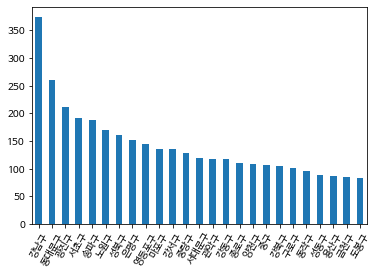

In [99]:
c.plot.bar(rot = 60)

In [103]:
# 상권업종소분류명이 '종합병원'인 것과
# 시도명이 '서울특별시'인 데이터만 가져오기
# 결과를 df_seoul_hospital에 할당

df_seoul_hospital = df[(df['상권업종소분류명'] =='종합병원') & (df['시도명'] =='서울특별시') ].copy() # df_seoul_hospital의 값을 바꿨을 때, df 값이 바뀌는 것을 방지

In [104]:
# 시군구명으로 그룹화

df_seoul_hospital['시군구명'].value_counts()

강남구     15
영등포구     8
서초구      6
광진구      6
중구       5
강동구      5
송파구      5
서대문구     4
강북구      4
양천구      4
도봉구      4
성북구      3
중랑구      2
구로구      2
금천구      2
노원구      2
동대문구     2
종로구      2
강서구      2
성동구      2
관악구      2
용산구      1
동작구      1
은평구      1
마포구      1
Name: 시군구명, dtype: int64

In [109]:
# 텍스트 데이터 색인하기
# ~df_seoul_hospital["상호명"].str.contains("종합병원") # 텍스트 중에서 '종합병원' 텍스트가 들어가지 않은 것을 가져옴.
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"),
                      "상호명"].unique() # 텍스트 중에서 '종합병원' 텍스트가 들어간 것을 가져옴. # 상호명만 보고싶어서, 열은 상호명만 가져옴

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [111]:
# 상호명에서 특정 단어가 들어가는 데이터만 가져오기 - 꽃배달
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,서초구,1165058100,반포4동,1.165011e+09,반포동,1165010700205510000,1,대지,551,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,서초구,1165058100,반포4동,1.165011e+09,반포동,1165010700205470006,1,대지,547,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [112]:
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains("의료기")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,영등포구,1156054000,여의동,1.156011e+09,여의도동,1156011000200620000,1,대지,62,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296


In [117]:
# 꽃배달, 의료기, 장례식장, 상담소, 어린이집은 종합병원과 무관하기 때문에
# 전처리를 위해서 해당 텍스트를 한번에 검색
# 제거할 데이터의 인덱스만  drop_row에 담아주고  list 형태로 변환

drop_row = df_seoul_hospital[df_seoul_hospital['상호명'].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index  # 이같은 형태 기억하기(파이프 연산) / .index 이러한 자료들의 index만 가져오게 됨
drop_row = drop_row.tolist() # 다시 리스트 형태로 바꿔주기 / 그래야지 drop할 수 있음
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [120]:
drop_row2 = df_seoul_hospital[df_seoul_hospital['상호명'].str.endswith("의원")].index # endswith() 특정글자로 끝나는 것
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [122]:
# drop_row들 합치기
drop_row = drop_row + drop_row2
len(drop_row)

57

In [125]:
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis = 0) # 행을 기준으로 삭제
df_seoul_hospital.shape

(58, 29)

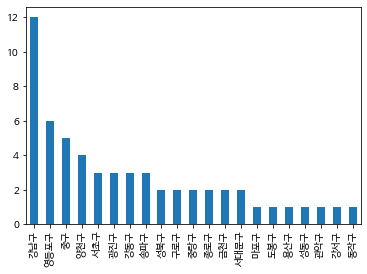

In [127]:
# 시군구명에 따라 종합병원의 숫자를 countplot으로 그리기
df_seoul_hospital['시군구명'].value_counts().plot.bar()

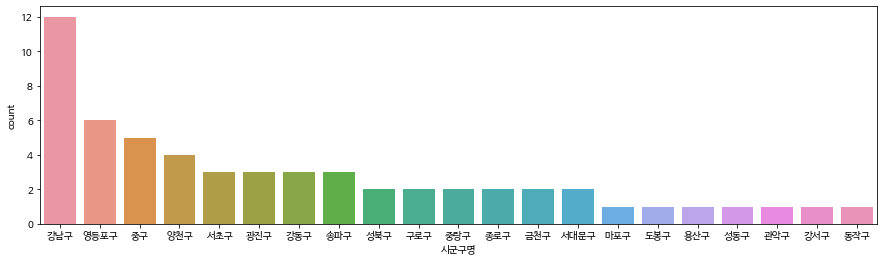

In [131]:
plt.figure(figsize = (15,4))
sns.countplot(data = df_seoul_hospital, x = "시군구명", order = df_seoul_hospital['시군구명'].value_counts().index) # order는 정렬을 해주는데, 어떤식으로 할거냐면, value_counts()에 의해서 정렬되는 순서대로 인덱스를 뽑아옴

In [132]:
# 지금까지 전처리한 것들을 한번 확인

df_seoul_hospital['상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

특정 지역만 보기

In [134]:
df_seoul = df[df['시도명'] =="서울특별시"].copy()
df_seoul.shape

(18943, 29)

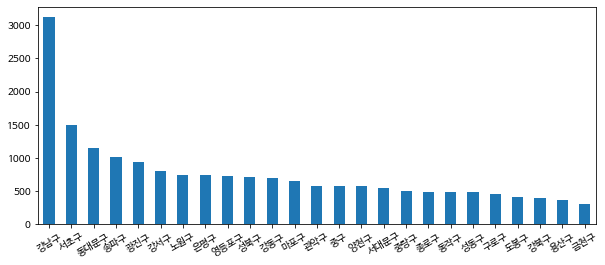

In [139]:
# df_seoul의 시군구명을 시각화
df_seoul['시군구명'].value_counts().plot.bar(figsize = (10,4), rot = 30)

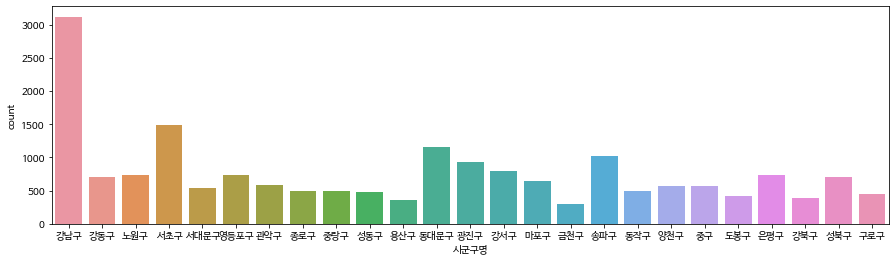

In [141]:
plt.figure(figsize = (15,4))
sns.countplot(data = df_seoul, x='시군구명' )

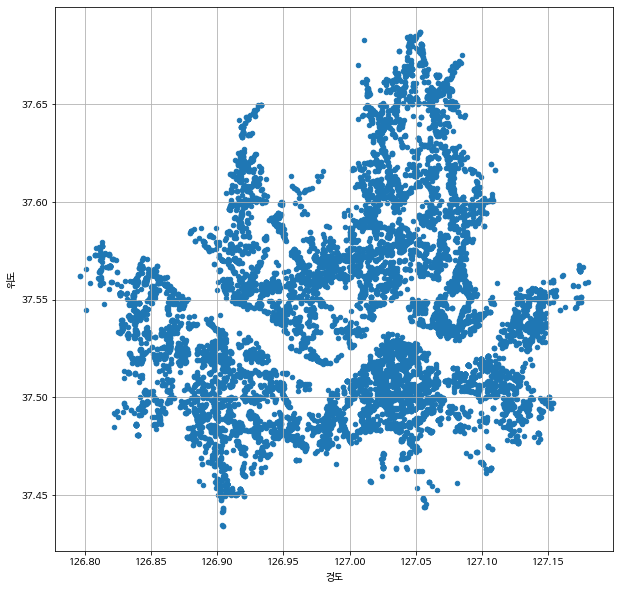

In [148]:
# pandas의 plot.scatter를 통해 경도와 위도를 표시
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(x = "경도",  y = '위도', figsize  = (10, 10), grid = True)

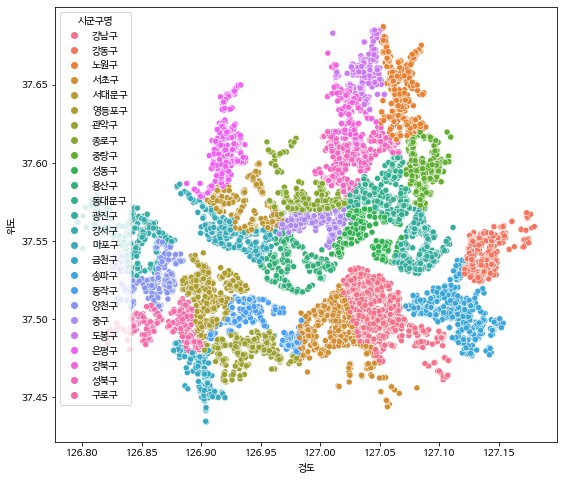

In [150]:
# seaborn으로 scatterplot
plt.figure(figsize = (9,8))
sns.scatterplot(data =df_seoul, x = '경도',  y = '위도', hue = "시군구명")

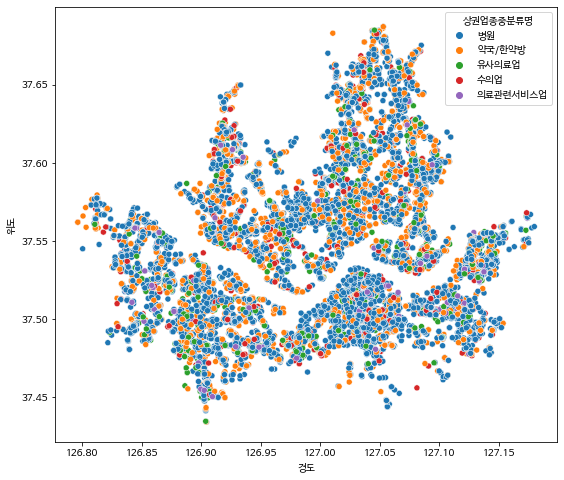

In [151]:
# seaborn의 scatterplot으로 상권업종중분류명 표시
plt.figure(figsize = (9,8))
sns.scatterplot(data =df_seoul, x = '경도',  y = '위도', hue = "상권업종중분류명")

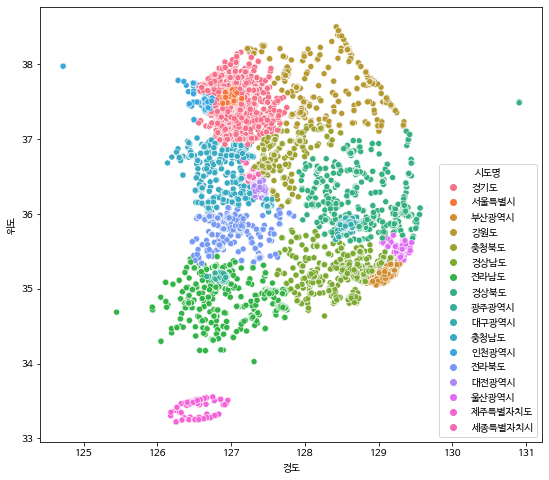

In [152]:
# seaborn의 scatterplot을 통해 전국 데이터로 구별 경도와 위도를 표시
plt.figure(figsize = (9,8))
sns.scatterplot(data = df, x = '경도',  y = '위도', hue = "시도명")

#1.13 Folium으로 지도 그리기

scatterplot은 수치형 데이터인 경우에 어느 좌표에 위치하는 지를 출력. 이렇게 출력을 하는 것은 직관적으로 데이터의 의미를 알기 힘듦.
Folium은 따로 설치가 되어있지 않아서 설치를 해줘야함.

In [154]:
#conda install -c conda-forge folium

import folium
folium.Map()

In [156]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구함
df_seoul_hospital['위도'].mean()
df_seoul_hospital['경도'].mean()

126.9963589356625

In [161]:
df_seoul_hospital.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,광진구,1121577000,중곡4동,1.121510e+09,중곡동,1121510100200580025,1,대지,58,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048


In [172]:
map = folium.Map(location = [df_seoul_hospital['위도'].mean(), df_seoul_hospital['경도'].mean()],
           zoom_start = 12) # 위도 경도는 리스트 형태로 넣어줌 # zoom_start: 줌 초기값

for n in df_seoul_hospital.index:
  name = df_seoul_hospital.loc[n, "상호명"]
  address = df_seoul_hospital.loc[n, "도로명주소"]
  popup = f'{name}-{address}'
  location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]

  # folium의 Marker에 방금 위에서 만들어준 위도 경도를 location에 name-address 형태의 주소를 popup에 넣어줌.
  folium.Marker( 
      location = location,
      popup = popup,
  ).add_to(map)


map

In [184]:
taewon_home_map = folium.Map(location = [37.550941, 126.934550], zoom_start = 18)
taewon_home_map